<a href="https://colab.research.google.com/github/Toadoum/STEM-Away-Job/blob/master/Preprocessing%2CEDA_%26_POS_STEM_Away.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ol>
    <li>Clean text
        <ul>
            <li> Parse words
            <li> Remove all special characters
            <li> Cleaned formatting
        </ul>
    <li> Tokenize
         <ul>
             <li> Words
             <li> Sentences
        </ul>
    <li> Counts
         <ul>
             <li> Word Count w/ visualization
             <li> Sentence Count w/ visualization
        </ul>
    <li> Stop Word Removal 
    <li> Stemitization
    <li> Lemmatization
    <li> Frequent Words
         <ul>
             <li> N-Grams
             <li> BiGrams
             <li> TriGrams
        </ul>
</ol>

In [1]:
import pandas as pd
import numpy as np 
import re

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()
# # used for better images in medium article
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

# Required downloads for use with above models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
df1=pd.read_csv('/content/machineLearningJobDataAustralia_Sydney.csv')
df2=pd.read_csv('/content/machineLearningJobDataCanada_Toronto.csv')
df3=pd.read_csv('/content/machineLearningJobDataGermany.csv')
df4=pd.read_csv('/content/machineLearningJobDataHong_Kong.csv')
df5=pd.read_csv('/content/machineLearningJobDataIndia.csv')
df6=pd.read_csv('/content/machineLearningJobDataIreland.csv')
df7=pd.read_csv('/content/machineLearningJobDataMalaysia.csv')
df8=pd.read_csv('/content/machineLearningJobDataNew_Zealand.csv')
df9=pd.read_csv('/content/machineLearningJobDataSingapore.csv')
df10=pd.read_csv('/content/machineLearningJobDataSouth_Africa.csv')
df11=pd.read_csv('/content/machineLearningJobDataUnited_Kingdom_London.csv')
df12=pd.read_csv('/content/machineLearningJobDataUnited_States_California.csv')

In [3]:
#Add dataframes to creade one
frames = [df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

df = pd.concat(frames)

In [4]:
df.head()

,Job-Type,Date-Posted,Salary,Job-Title,Date-Scraped,Url,Company,Location,Description
0,Full-time,2023-01-08,NaN,Machine Learning Engineer,2023-01-08 16:52:09.619578 MDT,https://www.google.com/search?q=Machine+Learni...,The Onset,"Sydney NSW, Australia","Job Description\n\nBuild software, save the wo..."
1,Full-time,2023-01-08,NaN,Senior Machine Learning Engineer,2023-01-08 16:52:10.217003 MDT,https://www.google.com/search?q=Machine+Learni...,CoTalent,"Sydney NSW, Australia",About The Company\n\nThis startup company has ...
2,Full-time,2023-01-08,NaN,Machine Learning Engineer,2023-01-08 16:52:10.789148 MDT,https://www.google.com/search?q=Machine+Learni...,Anduril Industries,"Sydney NSW, Australia","Anduril is a defence technology company, bring..."
3,Full-time,NaN,NaN,Machine Learning Engineer,2023-01-08 16:52:11.362130 MDT,https://www.google.com/search?q=Machine+Learni...,Rokt,"Sydney NSW, Australia",About Rokt\n\nRokt is the global leader in eCo...
4,Full-time,2023-01-08,NaN,Senior Machine Learning Engineer (User Trust &...,2023-01-08 16:52:11.951243 MDT,https://www.google.com/search?q=Machine+Learni...,Canva,"Sydney NSW, Australia","Canva’s Commitment and Mission\n\nAt Canva, we..."


In [5]:
len(df)

1006

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 119
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job-Type      993 non-null    object
 1   Date-Posted   680 non-null    object
 2   Salary        125 non-null    object
 3   Job-Title     1006 non-null   object
 4   Date-Scraped  1006 non-null   object
 5   Url           1006 non-null   object
 6   Company       1006 non-null   object
 7   Location      1006 non-null   object
 8   Description   1006 non-null   object
dtypes: object(9)
memory usage: 78.6+ KB


In [7]:
# scaling down the dataset as the description is all that is required
df_desc = df.Description

In [8]:
# random choice to get a sense of the data formatting and cell to check other indices
df_desc.iloc[598]

'Responsibilities\n\nTikTok is the leading destination for short-form mobile video. Our mission is to inspire creativity and bring joy. TikTok has global offices including Los Angeles, New York, London, Paris, Berlin, Dubai, Singapore, Jakarta, Seoul and Tokyo.\n\nWhy Join Us\nAt TikTok, our people are humble, intelligent, compassionate and creative. We create to inspire - for you, for us, and for more than 1 billion users on our platform. We lead with curiosity and aim for the highest, never shying away from taking calculated risks and embracing ambiguity as it comes. Here, the opportunities are limitless for those who dare to pursue bold ideas that exist just beyond the boundary of possibility. Join us and make impact happen with a career at TikTok.\n\nWe are now looking for talented individuals to join us for an internship in 2022 - people who want to inspire creativity and co-create the future with TikTok.\n\nSuccessful candidates must be able to commit to the following internship 

In [9]:
def clean_text(raw):
    '''Case specific to be used with pandas apply method'''
    try:
        # remove carriage returns and new lines
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')
        
        # brackets appear in all instances
        raw = raw.replace('[', '')
        raw = raw.replace(']', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')
        
        # removing html tags
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html, ' ', raw)
        
        # removing duplicate whitespace in between words
        clean_text = re.sub(" +", " ", clean_text) 
        
        # stripping first and last white space 
        clean_text = clean_text.strip()
        
        # commas had multiple spaces before and after in each instance
        clean_text = re.sub(" , ", ", ", clean_text) 
        
        # eliminating the extra comma after a period
        clean_text = clean_text.replace('.,', '.')
        
        # using try and except due to Nan in the column
    except:
        clean_text = np.nan
        
    return clean_text

In [10]:
df_desc = df_desc.apply(clean_text)
df_desc.iloc[876]

'At Onclusive, we are passionate about building software that solves important problems in marketing and communications. We partner with the most valuable companies in the world to transform how they use data and technology to drive marketing and brand decisions. Our software has been used to strategize responses to a brand crisis, discover new content and influencers, and gain an edge in the global online business world.As a Machine Learning Ops Engineer, you will work on deploying, scaling, and optimizing backend algorithms, robust and scalable data ingestion pipelines, machine learning services, and data platforms to support analysis on vast amounts of text and analytics data. You will apply your technical knowledge and Big Data analytics on Onclusive’s billions of online content data points to solve challenging marketing problems. ML Ops Engineers are integral to the success of Onclusive.Responsibilities:• Design and build scalable machine learning services and data... platforms.• 

In [11]:
# change the type from series to df and drop all missing values total: 301 missing descriptions
df_desc = pd.DataFrame(df_desc)
df_desc.dropna(inplace = True)
df_desc.reset_index(inplace = True, drop = True)

# Tokenization

In [12]:
# create a temp column for lowercased description
df_desc['lower_description'] = df_desc.Description.str.lower()

In [13]:
# regexp tokenizer eliminates the punctuation for the word count and is faster than word_tokenizer
tokenizer = RegexpTokenizer(r"\w+")
df_desc['word_tokenized'] = df_desc.lower_description.apply(lambda row: tokenizer.tokenize(row))


In [14]:
df_desc['sentence_tokenized'] = df_desc.Description.apply(lambda row: sent_tokenize(row))

In [15]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         1006 non-null   object
 1   lower_description   1006 non-null   object
 2   word_tokenized      1006 non-null   object
 3   sentence_tokenized  1006 non-null   object
dtypes: object(4)
memory usage: 31.6+ KB


In [16]:
df_desc.word_tokenized.head()

0    [job, descriptionbuild, software, save, the, w...
1    [about, the, companythis, startup, company, ha...
2    [anduril, is, a, defence, technology, company,...
3    [about, roktrokt, is, the, global, leader, in,...
4    [canva, s, commitment, and, missionat, canva, ...
Name: word_tokenized, dtype: object

# Word Count

In [17]:
# obtains a word count for each individual job description 
df_desc['word_count'] = df_desc.word_tokenized.str.len()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


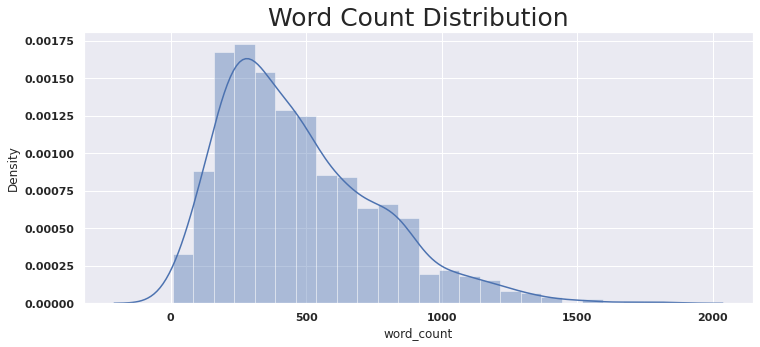

In [18]:
plt.figure(figsize = (12,5))
sns.distplot(df_desc['word_count'])
plt.title('Word Count Distribution', size = 25);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


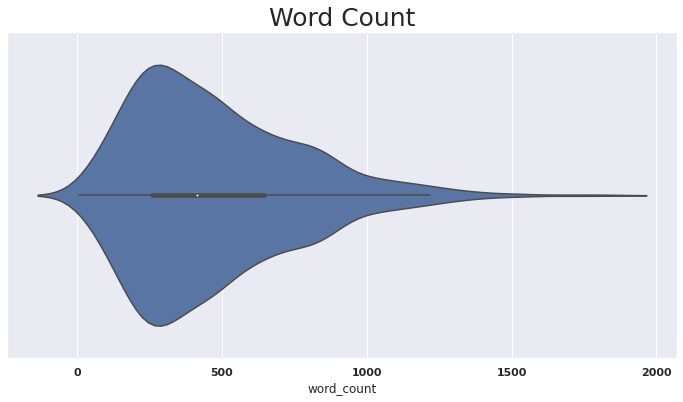

In [19]:
plt.figure(figsize = (12, 6));
sns.violinplot(df_desc["word_count"])
plt.title('Word Count', size = 25);

# Sentence Count

In [20]:
# obtains sentence count for each indiviual job description
df_desc['sentence_count'] = df_desc.sentence_tokenized.str.len()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


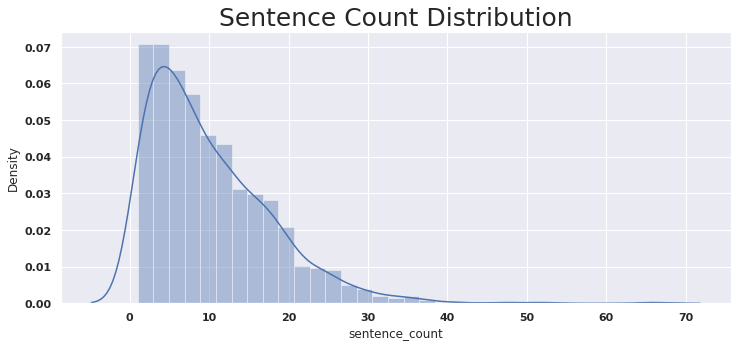

In [21]:
plt.figure(figsize = (12,5))
sns.distplot(df_desc['sentence_count'])
plt.title('Sentence Count Distribution', size = 25);

# Descriptive Statistics

In [22]:
df_desc.describe()

,word_count,sentence_count
count,1006.000000,1006.000000
mean,475.166998,10.025845
std,287.903432,7.758374
min,8.000000,1.000000
25%,258.250000,4.000000
50%,413.000000,8.000000
75%,645.250000,14.000000
max,1821.000000,66.000000


In [23]:
# # indices to be removed were examined by description of observations who's value were below 11; 
# # extra indices included are redundant or had no relevant info;
# extra_indices = [20, 21, 36, 155, 428, 478, 685, 900, 1008, 1009]
# indices_remove =  df_desc.loc[df_desc.word_count <= 12].index 
# indices_remove = list(indices_remove) + extra_indices
# print(len(indices_remove), 'observations to be removed')

# Stop Words

In [24]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         1006 non-null   object
 1   lower_description   1006 non-null   object
 2   word_tokenized      1006 non-null   object
 3   sentence_tokenized  1006 non-null   object
 4   word_count          1006 non-null   int64 
 5   sentence_count      1006 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.3+ KB


In [25]:
df_desc.head()

,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count
0,"Job DescriptionBuild software, save the world!...","job descriptionbuild software, save the world!...","[job, descriptionbuild, software, save, the, w...","[Job DescriptionBuild software, save the world...",247,1
1,About The CompanyThis startup company has rece...,about the companythis startup company has rece...,"[about, the, companythis, startup, company, ha...",[About The CompanyThis startup company has rec...,186,1
2,"Anduril is a defence technology company, bring...","anduril is a defence technology company, bring...","[anduril, is, a, defence, technology, company,...","[Anduril is a defence technology company, brin...",301,7
3,About RoktRokt is the global leader in eCommer...,about roktrokt is the global leader in ecommer...,"[about, roktrokt, is, the, global, leader, in,...",[About RoktRokt is the global leader in eComme...,1237,36
4,"Canva’s Commitment and MissionAt Canva, we cel...","canva’s commitment and missionat canva, we cel...","[canva, s, commitment, and, missionat, canva, ...","[Canva’s Commitment and MissionAt Canva, we ce...",244,6


In [26]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned

In [27]:
df_desc['clean_words'] = df_desc.word_tokenized.apply(stopword_removal)

# Stemming & Lemmatization

In [28]:
# stemmed and lemma words were both examined to choose which method was best suited
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

In [29]:
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)

In [30]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [31]:
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)

In [32]:
df_desc['clean_lemmed'].head()

0    [job, descriptionbuild, software, save, world,...
1    [companythis, startup, company, received, back...
2    [anduril, defence, technology, company, bringi...
3    [roktrokt, global, leader, ecommerce, technolo...
4    [canva, commitment, missionat, canva, celebrat...
Name: clean_lemmed, dtype: object

In [33]:
# general corpus & one distinguished with lemmatization applied
# to be used with an additional for loop in the future
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row

In [34]:
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

In [35]:
len(stem_corpus), len(lem_corpus)

(311138, 311138)

# Frequent Words 

## (Stemmed)

In [36]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

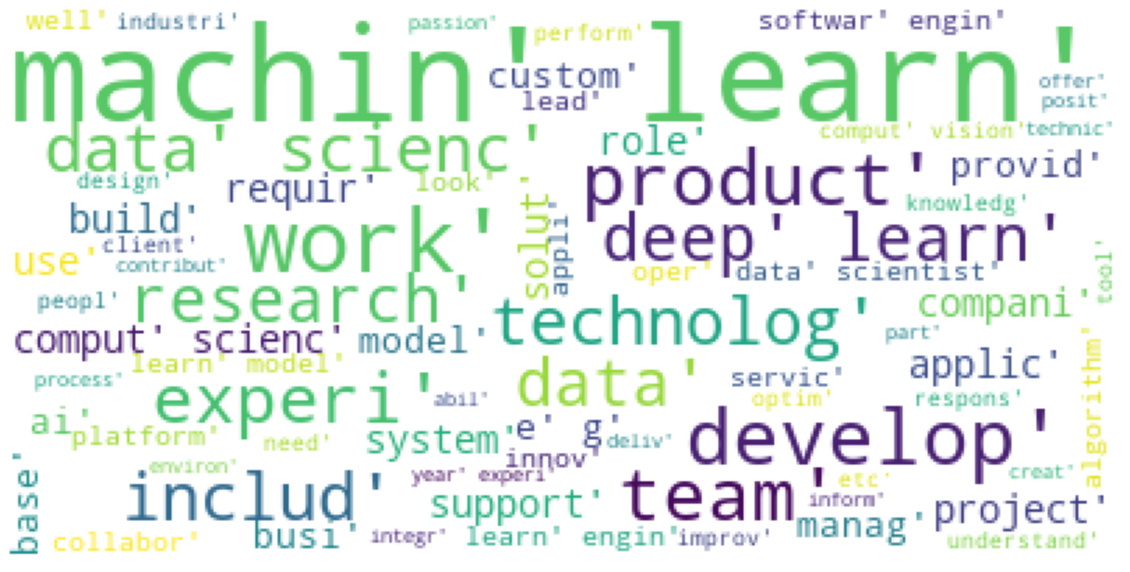

In [37]:
stem_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          min_font_size = 6,
                          random_state=42
                         ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [38]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]


In [39]:
top_stem.head()
# top_stem.tail()

,Word,Freq
0,learn,5490
1,data,4830
2,experi,4491
3,work,3833
4,machin,3783


In [40]:
top_stem.describe()

,Freq
count,12908.000000
mean,23.786334
std,137.138462
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,5490.000000


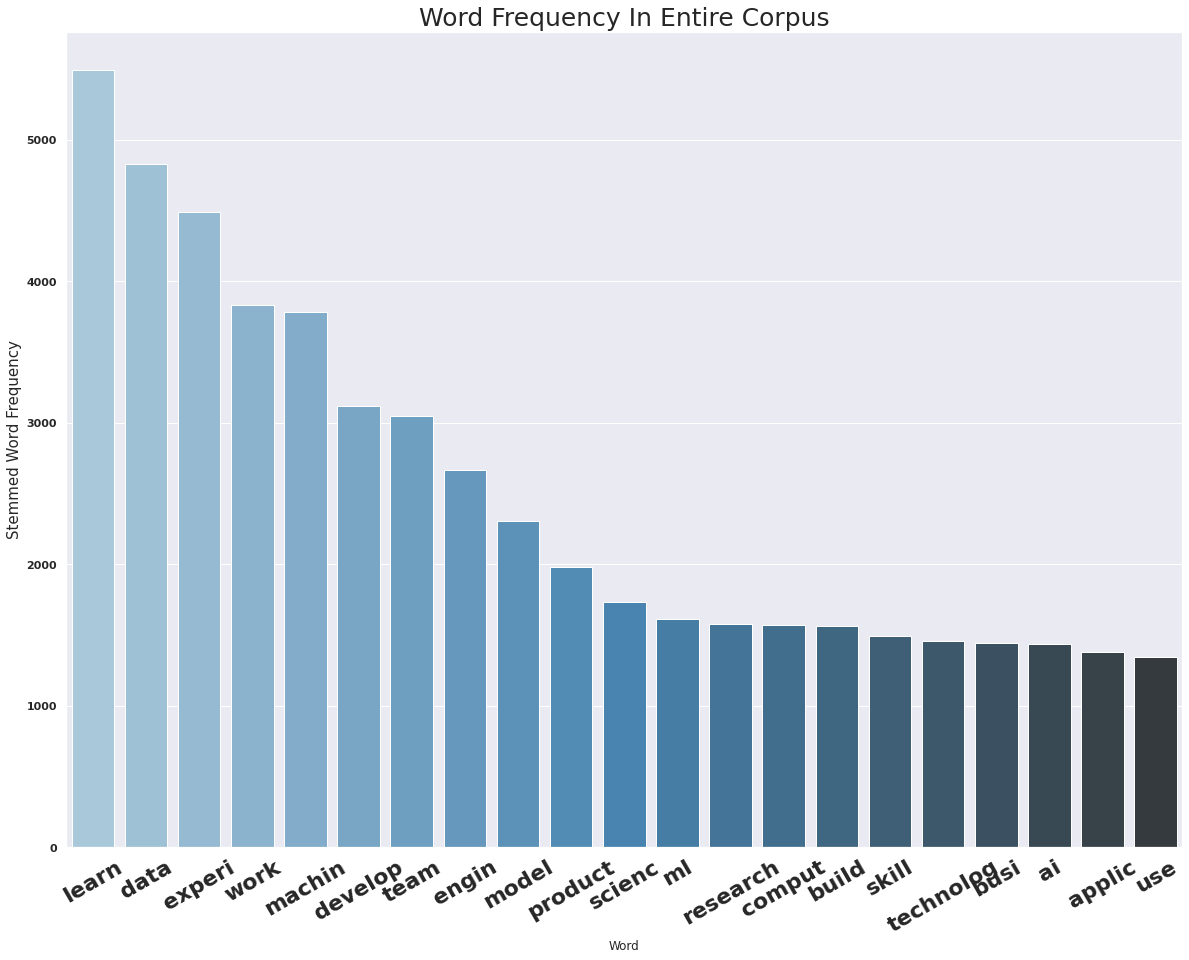

In [41]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(20,15)})
stem_bar = sns.barplot(x="Word", y="Freq", data=top_stem[:21], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Stemmed Word Frequency', size = 15)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), rotation=30, fontsize = 22);


## (Lemmatized)

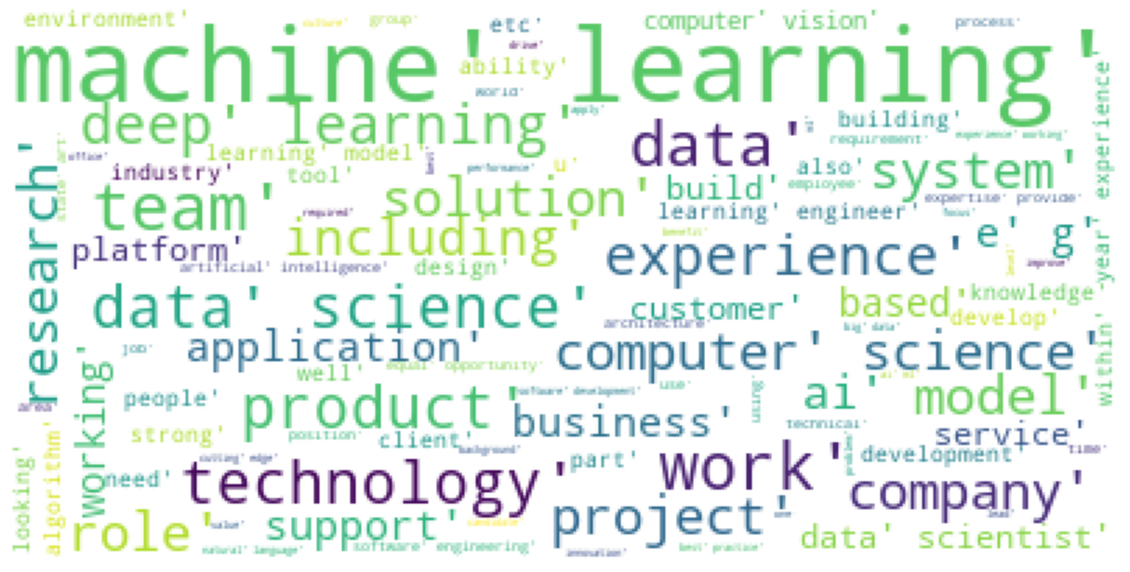

In [42]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');
# wordcloud.to_file('lemma_wordcloud.png');


In [43]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

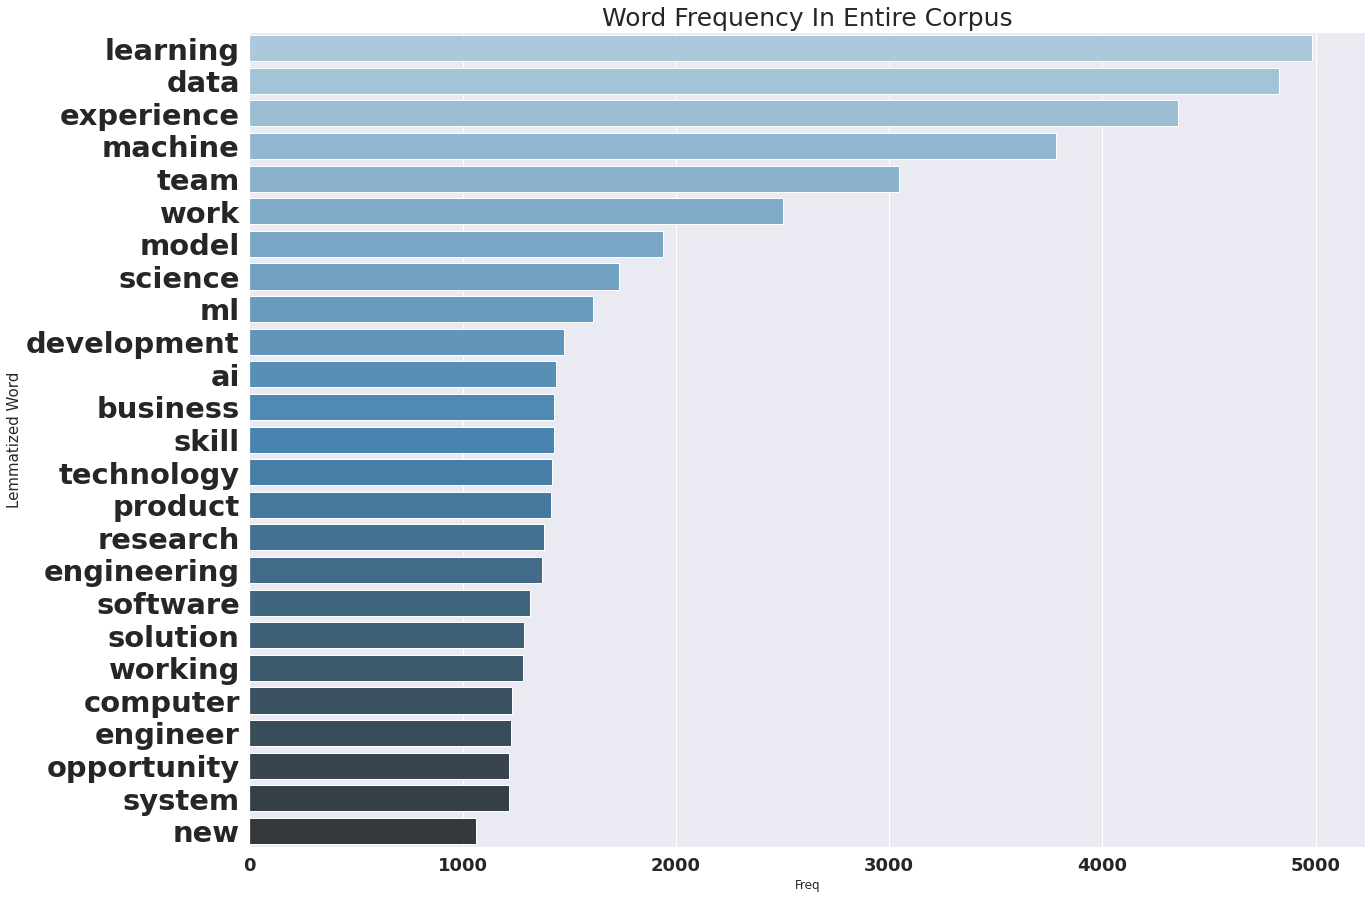

In [44]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:25], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 29);
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Lemmatized Word', size = 15)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

In [45]:
# where does python fall within the word frequency dist
top_df.loc[top_df.Word == 'python']

,Word,Freq
33,python,959


# N-grams

## Bigrams

In [46]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [47]:
# corpus with stopwords removed and list joined for n-gram distinction
ngram_corpus = df_desc.clean_words.str.join(' ')

In [48]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

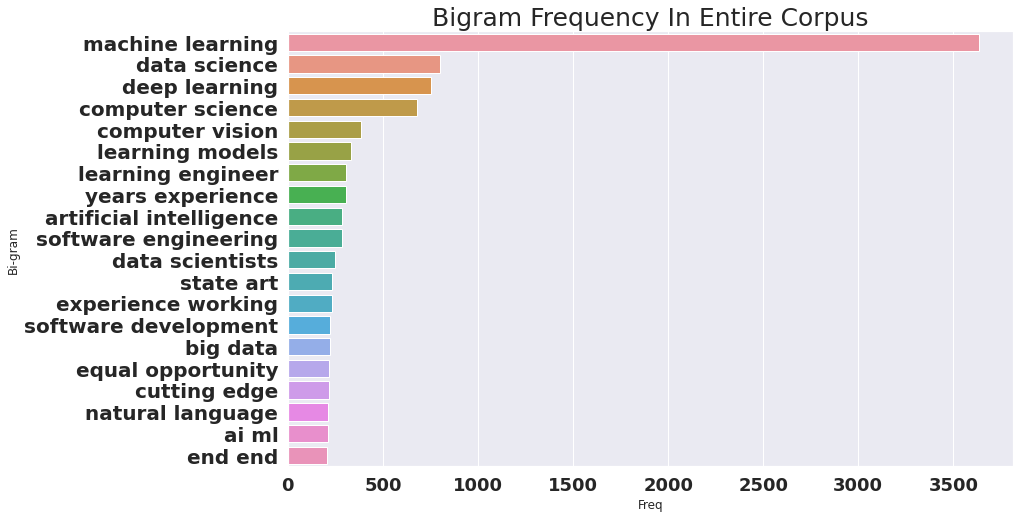

In [49]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="Bi-gram", x ="Freq", orient = 'h', data = top2_df[:20])
plt.title('Bigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('bigram_bar.png', dpi=200)

## Trigrams

In [50]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [51]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]


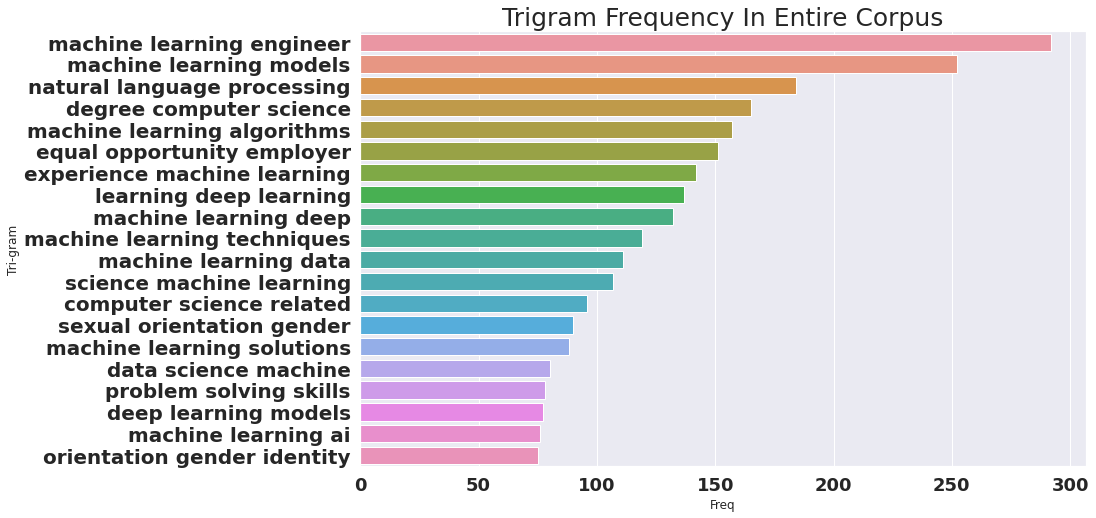

In [52]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(13,8)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top3_df[:20])
plt.title('Trigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 20);
plt.savefig('trigram_bar.png', dpi=200)

# Saving Dataset 


In [53]:
df_desc.to_csv('df_description_processed.csv', index = False)

## POS & Chunking

In [53]:
import pandas as pd
import numpy as np 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()

import nltk

In [54]:
data = pd.read_csv('/content/df_description_processed.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         1006 non-null   object
 1   lower_description   1006 non-null   object
 2   word_tokenized      1006 non-null   object
 3   sentence_tokenized  1006 non-null   object
 4   word_count          1006 non-null   int64 
 5   sentence_count      1006 non-null   int64 
 6   clean_words         1006 non-null   object
 7   clean_stemmed       1006 non-null   object
 8   clean_lemmed        1006 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.9+ KB


In [57]:
data.head()

,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_stemmed,clean_lemmed
0,"Job DescriptionBuild software, save the world!...","job descriptionbuild software, save the world!...","['job', 'descriptionbuild', 'software', 'save'...","['Job DescriptionBuild software, save the worl...",247,1,"['job', 'descriptionbuild', 'software', 'save'...","['job', 'descriptionbuild', 'softwar', 'save',...","['job', 'descriptionbuild', 'software', 'save'..."
1,About The CompanyThis startup company has rece...,about the companythis startup company has rece...,"['about', 'the', 'companythis', 'startup', 'co...","[""About The CompanyThis startup company has re...",186,1,"['companythis', 'startup', 'company', 'receive...","['companythi', 'startup', 'compani', 'receiv',...","['companythis', 'startup', 'company', 'receive..."
2,"Anduril is a defence technology company, bring...","anduril is a defence technology company, bring...","['anduril', 'is', 'a', 'defence', 'technology'...","['Anduril is a defence technology company, bri...",301,7,"['anduril', 'defence', 'technology', 'company'...","['anduril', 'defenc', 'technolog', 'compani', ...","['anduril', 'defence', 'technology', 'company'..."
3,About RoktRokt is the global leader in eCommer...,about roktrokt is the global leader in ecommer...,"['about', 'roktrokt', 'is', 'the', 'global', '...",['About RoktRokt is the global leader in eComm...,1237,36,"['roktrokt', 'global', 'leader', 'ecommerce', ...","['roktrokt', 'global', 'leader', 'ecommerc', '...","['roktrokt', 'global', 'leader', 'ecommerce', ..."
4,"Canva’s Commitment and MissionAt Canva, we cel...","canva’s commitment and missionat canva, we cel...","['canva', 's', 'commitment', 'and', 'missionat...","['Canva’s Commitment and MissionAt Canva, we c...",244,6,"['canva', 'commitment', 'missionat', 'canva', ...","['canva', 'commit', 'missionat', 'canva', 'cel...","['canva', 'commitment', 'missionat', 'canva', ..."


In [55]:
data.describe()

,word_count,sentence_count
count,1006.000000,1006.000000
mean,475.166998,10.025845
std,287.903432,7.758374
min,8.000000,1.000000
25%,258.250000,4.000000
50%,413.000000,8.000000
75%,645.250000,14.000000
max,1821.000000,66.000000


In [56]:
# drop duplicates
data.drop_duplicates(inplace = True)
data.shape

(993, 9)

## Parts of Speech Tagging (POS)

In [58]:
def pos_series(keyword):
    '''categorizes parts of speech after tokenizing words with POS tags'''
    tokens = nltk.word_tokenize(keyword)
    tagged = nltk.pos_tag(tokens)
    return tagged

In [60]:
# cell runs slower due to computational exhaustion
pos_tagged_arrs = data.lower_description.apply(pos_series)

In [61]:
# unloads the tuples from the tree object for easier manipulation
pos_tagged = []
for row in pos_tagged_arrs.values:
    for element in row:
        pos_tagged.append(element)

In [62]:
# dataframe contains all of the words with their corresponding pos tag;
pos_df = pd.DataFrame(pos_tagged, columns = ('word','POS'))
# special chars were removed due to irrelevance as a tag but will be included in regex
char_removal = [',', '.', ':', '#', '$', '\'\'', '``', '(', ')']
drop_indices = (pos_df.loc[pos_df.POS.isin(char_removal)].index)
pos_df.drop(drop_indices, inplace = True)

In [63]:
# frequency of the unique pos tags within the dataset
pos_sum = pos_df.groupby('POS').count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,word
POS,
NN,129025
JJ,57010
IN,48818
NNS,43277
CC,29172
DT,26646
VB,21938
VBG,16064
TO,13549


In [65]:
# takes a random sample and shows structure of array along with how each is tagged
sample = data.lower_description.sample(5)
samples = []
for doc in sample:
    tokens = nltk.word_tokenize(doc)
    samples.append(nltk.pos_tag(tokens))
    
samples[2]

[('tcl', 'NN'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('’', 'NN'),
 ('s', 'NN'),
 ('leading', 'VBG'),
 ('manufacturers', 'NNS'),
 ('of', 'IN'),
 ('consumer', 'NN'),
 ('electronic', 'JJ'),
 ('products', 'NNS'),
 (',', ','),
 ('engaged', 'VBN'),
 ('in', 'IN'),
 ('research', 'NN'),
 ('&', 'CC'),
 ('development', 'NN'),
 (',', ','),
 ('manufacturing', 'NN'),
 ('and', 'CC'),
 ('sales', 'NNS'),
 ('of', 'IN'),
 ('tv', 'NN'),
 ('and', 'CC'),
 ('audio-video', 'JJ'),
 ('products', 'NNS'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('global', 'JJ'),
 ('distribution', 'NN'),
 ('sales', 'NNS'),
 ('network.the', 'RB'),
 ('core', 'VBP'),
 ('search', 'NN'),
 ('&', 'CC'),
 ('recommendations', 'NNS'),
 ('team', 'NN'),
 ('at', 'IN'),
 ('tcl', 'NN'),
 ('is', 'VBZ'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('seniordata', 'JJ'),
 ('scientist', 'NN'),
 ('to', 'TO'),
 ('help', 'VB'),
 ('build', 'VB'),
 ('the', 'DT'),
 ('next', 'JJ'),
 ('generation', 'NN'),
 ('of', 

## Analyses of POS

In [67]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [68]:
# print out of the pos tags for easy reference
for tag in pos_df.POS.unique():
    print(nltk.help.upenn_tagset(tag))

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
None
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
None
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
None
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None
EX: existen

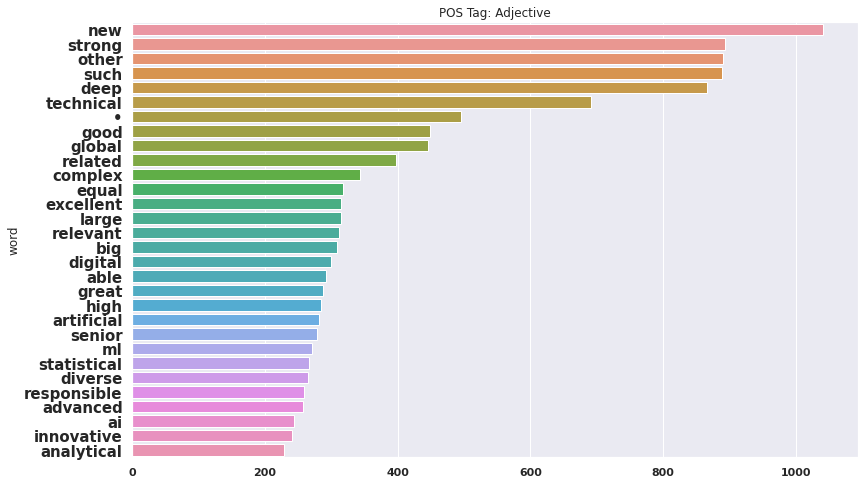

In [69]:
# adjectives
jj_tag = pos_df.loc[pos_df.POS == 'JJ'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
jjbar = sns.barplot(y = jj_tag.index, x = jj_tag.values, orient = 'h')
plt.title('POS Tag: Adjective')
jjbar.set_yticklabels(jjbar.get_yticklabels(), fontsize = 15);

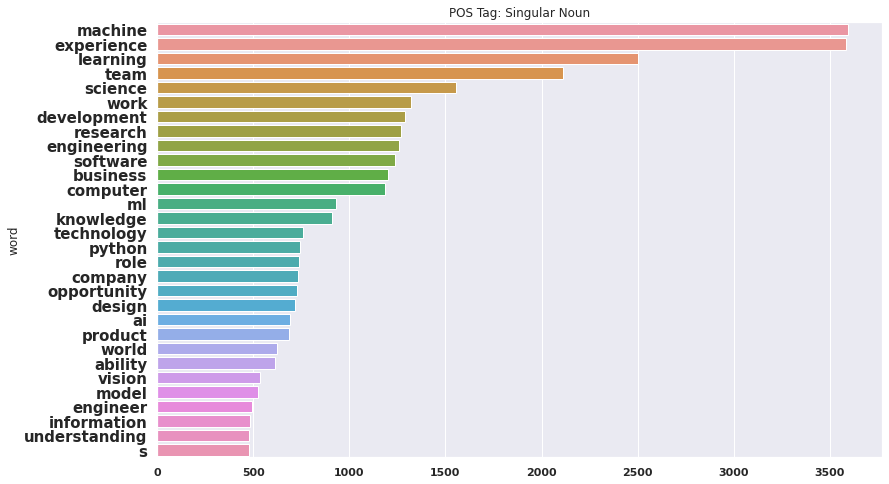

In [70]:
# nouns singular
nn_tag = pos_df.loc[pos_df.POS == 'NN'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
nnbar = sns.barplot(y = nn_tag.index, x = nn_tag.values, orient = 'h')
plt.title('POS Tag: Singular Noun')
nnbar.set_yticklabels(nnbar.get_yticklabels(), fontsize = 15);

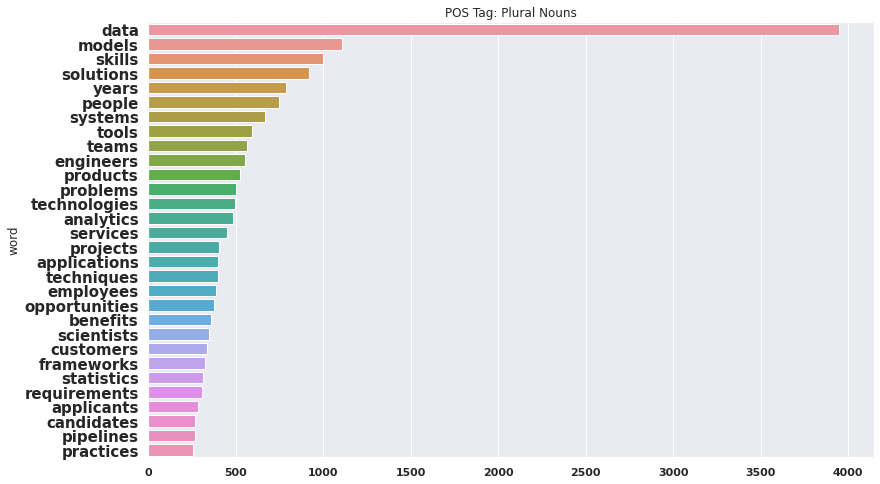

In [71]:
# nouns plural
NNS_tag = pos_df.loc[pos_df.POS == 'NNS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNSbar = sns.barplot(y = NNS_tag.index, x = NNS_tag.values, orient = 'h')
plt.title('POS Tag: Plural Nouns')
NNSbar.set_yticklabels(NNSbar.get_yticklabels(), fontsize = 15);

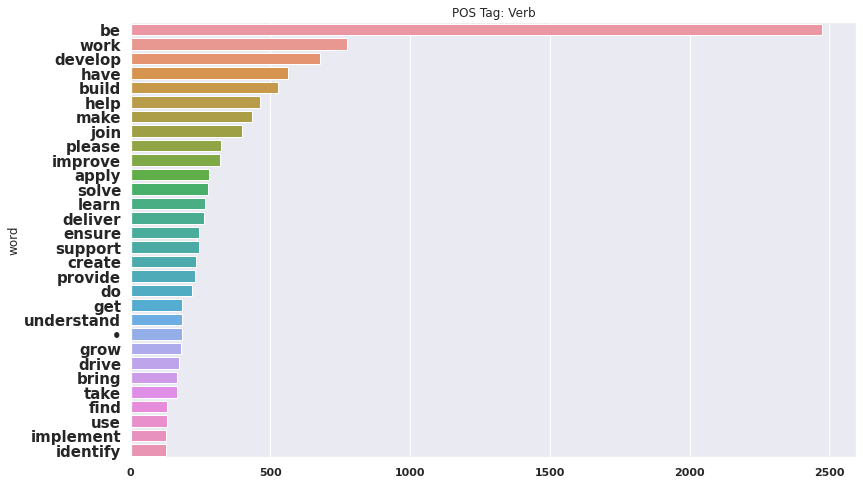

In [72]:
# verb base form 
VB_tag = pos_df.loc[pos_df.POS == 'VB'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBbar = sns.barplot(y = VB_tag.index, x = VB_tag.values, orient = 'h')
plt.title('POS Tag: Verb')
VBbar.set_yticklabels(VBbar.get_yticklabels(), fontsize = 15);


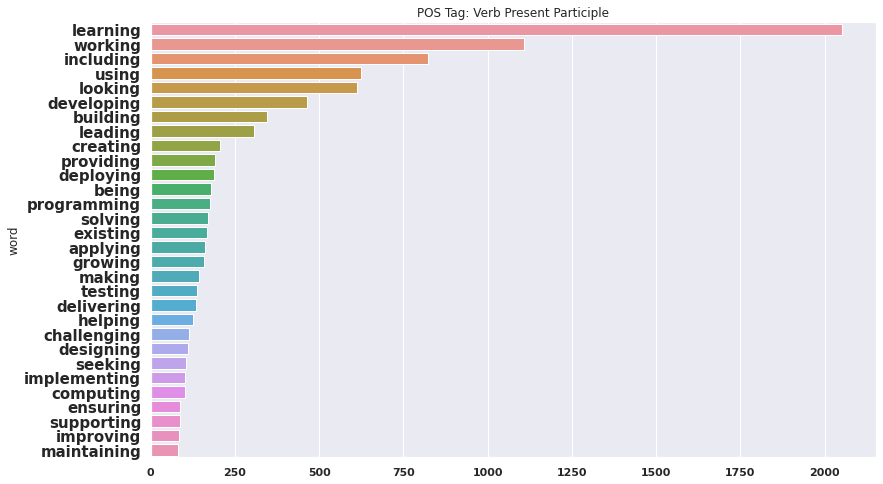

In [73]:
# Verb, present participle
VBG_tag = pos_df.loc[pos_df.POS == 'VBG'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBGbar = sns.barplot(y = VBG_tag.index, x = VBG_tag.values, orient = 'h')
plt.title('POS Tag: Verb Present Participle')
VBGbar.set_yticklabels(VBGbar.get_yticklabels(), fontsize = 15);

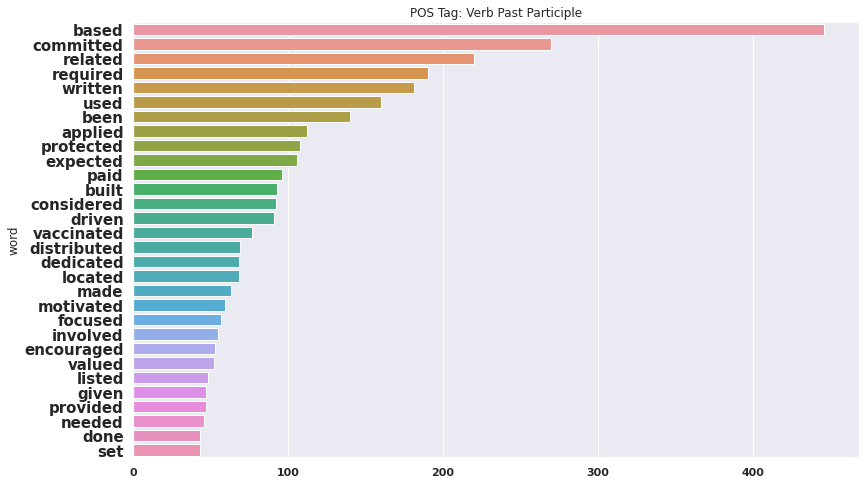

In [74]:
# Verb, past participle
VBN_tag = pos_df.loc[pos_df.POS == 'VBN'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBNbar = sns.barplot(y = VBN_tag.index, x = VBN_tag.values, orient = 'h')
plt.title('POS Tag: Verb Past Participle')
VBNbar.set_yticklabels(VBNbar.get_yticklabels(), fontsize = 15);

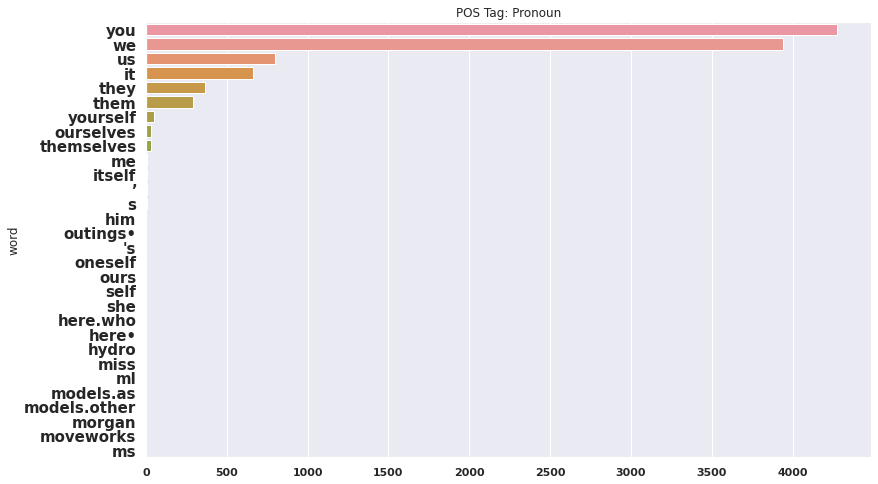

In [75]:
# Personal pronoun
PRP_tag = pos_df.loc[pos_df.POS == 'PRP'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
PRPbar = sns.barplot(y = PRP_tag.index, x = PRP_tag.values, orient = 'h')
plt.title('POS Tag: Pronoun')
PRPbar.set_yticklabels(PRPbar.get_yticklabels(), fontsize = 15);

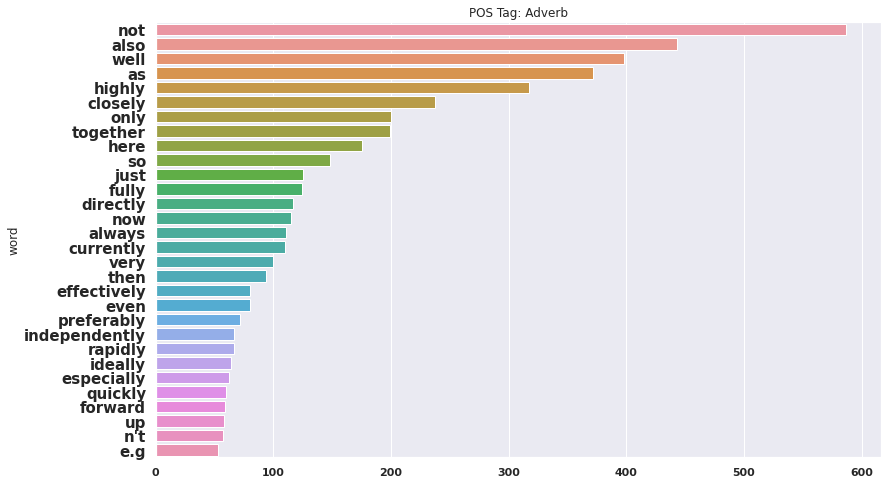

In [76]:
# adverb
RB_tag = pos_df.loc[pos_df.POS == 'RB'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
RBbar = sns.barplot(y = RB_tag.index, x = RB_tag.values, orient = 'h')
plt.title('POS Tag: Adverb')
RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);

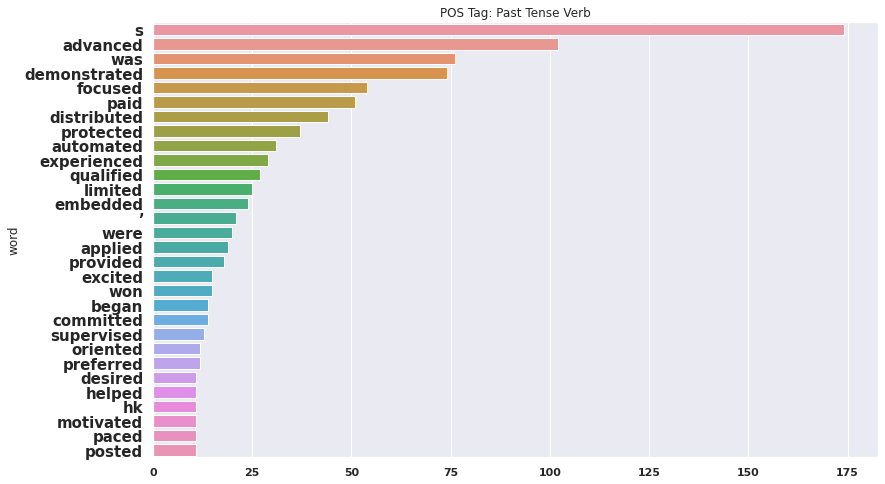

In [77]:
# Verb, past tense
VBD_tag = pos_df.loc[pos_df.POS == 'VBD'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBDbar = sns.barplot(y = VBD_tag.index, x = VBD_tag.values, orient = 'h')
plt.title('POS Tag: Past Tense Verb')
VBDbar.set_yticklabels(VBDbar.get_yticklabels(), fontsize = 15);

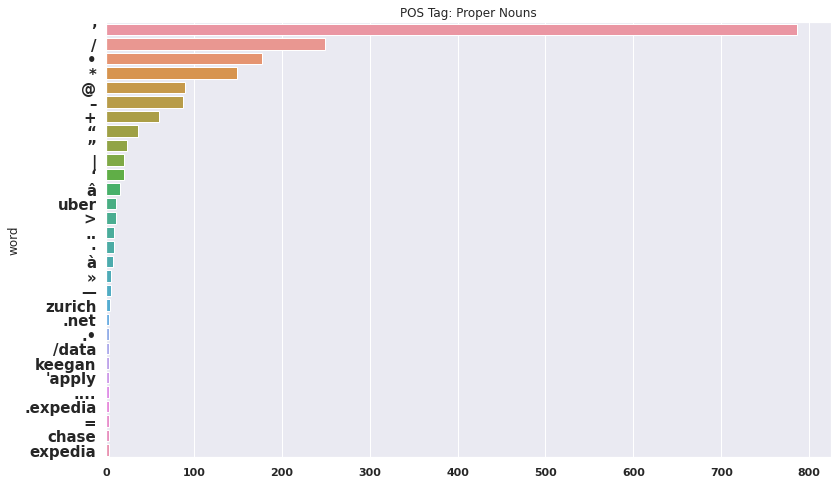

In [78]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'NNP'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Nouns')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);

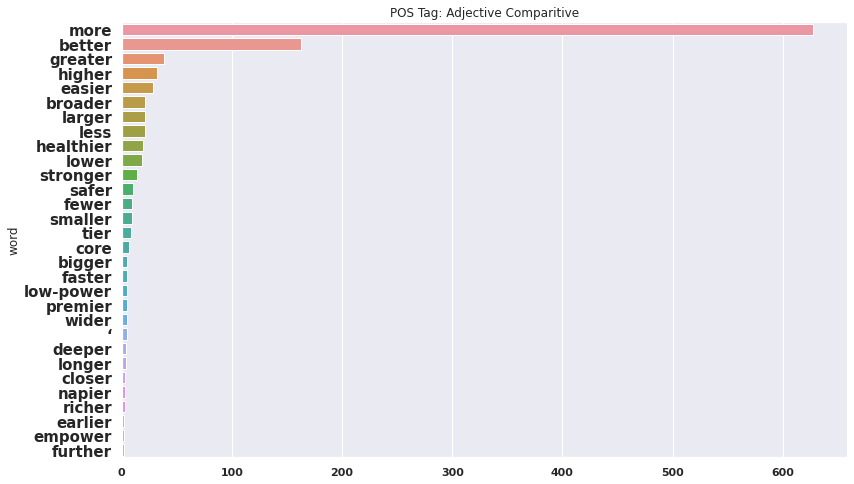

In [79]:
# 	Adjective, comparative
JJR_tag = pos_df.loc[pos_df.POS == 'JJR'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
JJRbar = sns.barplot(y = JJR_tag.index, x = JJR_tag.values, orient = 'h')
plt.title('POS Tag: Adjective Comparitive')
JJRbar.set_yticklabels(JJRbar.get_yticklabels(), fontsize = 15);

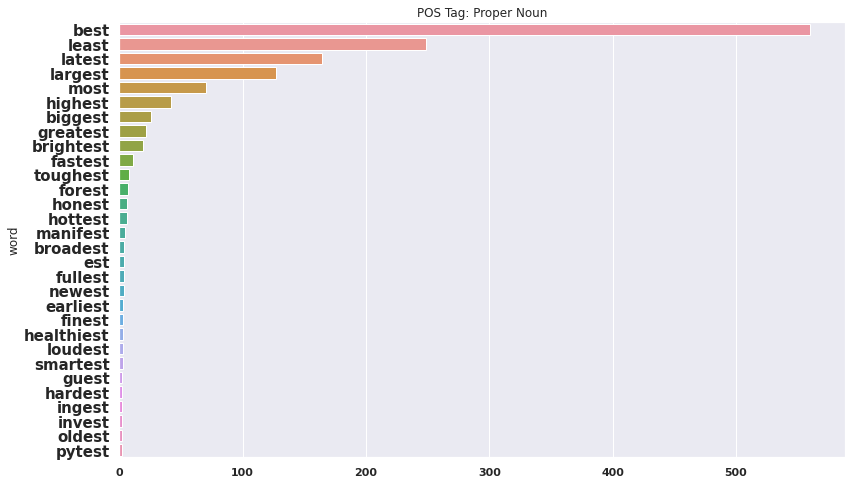

In [80]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'JJS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Noun')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);